# Visualizing a Convolutional and Maxpooling Layers

This notebook is based on a great work created and posted by [Udacity](https://github.com/udacity/deep-learning-v2-pytorch). 

In this notebook, we visualize the outputs of a convolutional layer and a maxpooling layer in a CNN. 

A convolutional layer + activation function, followed by a pooling layer, and a linear layer make up the basic layers of a CNN.



### Import the image, convert to gray, and normalize

In [0]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My\ Drive/"

Mounted at /content/gdrive


In [0]:
path = "./gdrive/My Drive/cars/bmw/333.jpg"

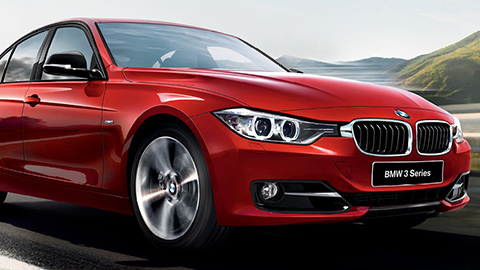

In [73]:
# Read the image
bgr_img = cv2.imread(path)
cv2_imshow(bgr_img)

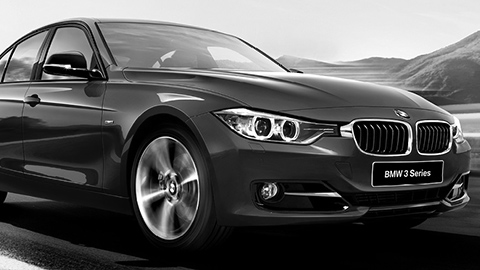

In [74]:
# convert to grayscale
type(bgr_img)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

In [0]:
# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

### Define and visualize the filters

In [76]:
import numpy as np

# Initial filter
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [77]:
# Defining four different filters, 
# all of which are linear combinations of the `filter_vals` defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# Values of filter 1
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


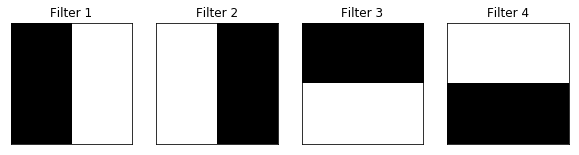

In [78]:
# visualize all filters
fig = plt.figure(figsize=(10, 6))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title(f'Filter {i+1}')

### Define convolutional and pooling layers


In the next cell, we initialize a convolutional layer so that it contains all the created filters. Then add a maxpooling layer with a kernel size of (2x2) so we can see that the image resolution has been reduced after this step!

A maxpooling layer reduces the x-y size of an input and only keeps the most *active* pixel values.

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# define a neural network with a convolutional layer with four filters
# AND a maxpooling layer of size (2, 2)
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:] # shape of weight [4, 1, 4, 4]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight) # shape of conv.weight [4, 1, 4, 4]
        # define a pooling layer
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # applies pooling layer
        pooled_x = self.pool(activated_x)
        
        # returns all layers
        return conv_x, activated_x, pooled_x

In [0]:
# convert the filters to a float tensor as expected by the model
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)

In [84]:
# instantiate the model and set the weights
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


to understand what's going on let's dig a bit into the details. Below is the shape of the convolution parameters. In order to feed the weights to the model we need to make sure that they match in shape.

In [85]:
# shape of conv parameters
next(iter(model.conv.parameters())).shape

torch.Size([4, 1, 4, 4])

In [86]:
# shape of our filters
torch.from_numpy(filters).shape

torch.Size([4, 4, 4])

In [87]:
# reshape filters to match the shape of conv.weights
torch.from_numpy(filters).unsqueeze(1).shape

torch.Size([4, 1, 4, 4])

In [0]:
# convert to a float tensor as expected by the model
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)

### Visualize the output of each filter

First, we'll define a helper function, `viz_layer` that takes in a specific layer and number of filters, and displays the output of that layer once an image has been passed through. I this case, this will produce 4 images each corresponding to one of the defined filters.

In [89]:
# shape of the image
torch.from_numpy(gray_img).shape

torch.Size([270, 480])

PyTorch expects the shape of the input to be (batch, channel, hight, width). So, we need to add two extra dimentions as the begining to represent a batch with single item (1 image) and an image with a single channel (gray)

In [90]:
torch.from_numpy(gray_img).unsqueeze(0).shape

torch.Size([1, 270, 480])

In [91]:
torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(0).shape

torch.Size([1, 1, 270, 480])

In [92]:
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(0)

# get all the layers 
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

activated_layer.shape

torch.Size([1, 4, 267, 477])

In [93]:
activated_layer.shape

torch.Size([1, 4, 267, 477])

In [94]:
pooled_layer.shape

torch.Size([1, 4, 133, 238])

We can see that the size of the output of the pooling layer is half of of its inputs that is coming from the convoluation layer

In [95]:
pooled_layer.squeeze().shape

torch.Size([4, 133, 238])

In [97]:
# extract the data from the tensor and convert it to numpy array so that we can plot the result
pooled_layer[0,i].data.numpy()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01568615, 0.00392157,
        0.        ],
       [0.        , 0.00784338, 0.01568586, ..., 0.03137219, 0.0196076 ,
        0.        ],
       ...,
       [0.1372549 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.14901954, 0.07843065, ..., 0.        , 0.        ,
        0.        ],
       [0.3215692 , 0.15686339, 0.05490243, ..., 0.00784315, 0.00392157,
        0.        ]], dtype=float32)

In [0]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray') #access the data of the tensor and convert to numpy array
        ax.set_title('Output %s' % str(i+1))

Let's visualize the activated conv layer

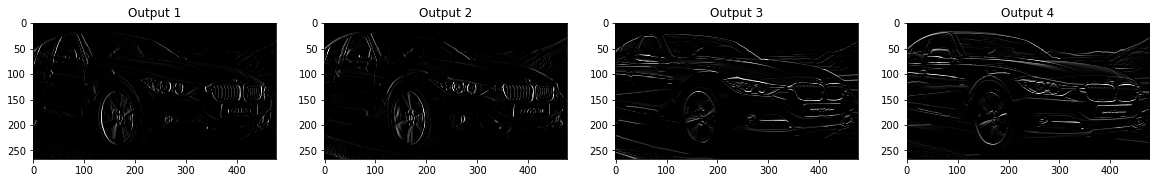

In [99]:
# visualize the output of the activated conv layer
viz_layer(activated_layer)

### Visualize the output of the pooling layer

Then, take a look at the output of a pooling layer. The pooling layer takes as input the feature maps pictured above and reduces the dimensionality of those maps, by some pooling factor, by constructing a new, smaller image of only the maximum (brightest) values in a given kernel area.

Take a look at the values on the x, y axes to see how the image has changed size.



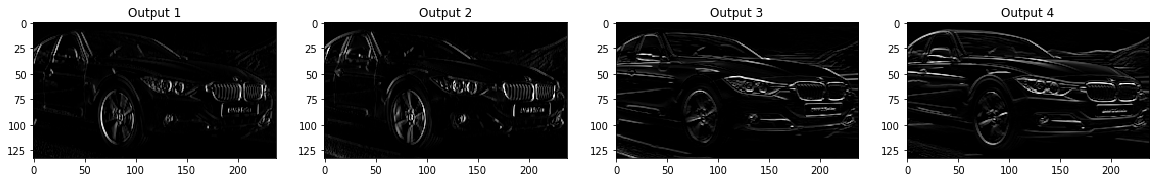

In [100]:
# visualize the output of the pooling layer
viz_layer(pooled_layer)